In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import joblib

In [6]:
#membaca dataset
data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [8]:
#terdapat 13 kolom dangan 374 data yang terdapat pada dataset
data.shape

(374, 13)

In [11]:
#Menampilkan info data yang tersimpan pada dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [12]:
#menampilkan 5 baris awal
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [14]:
#menampilkan 5 baris akhir data
data.tail()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [15]:
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
    mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) +" columns.\n"
    "There are " + str(mis_val_table_ren_columns.shape[0]) +
    " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

<Axes: >

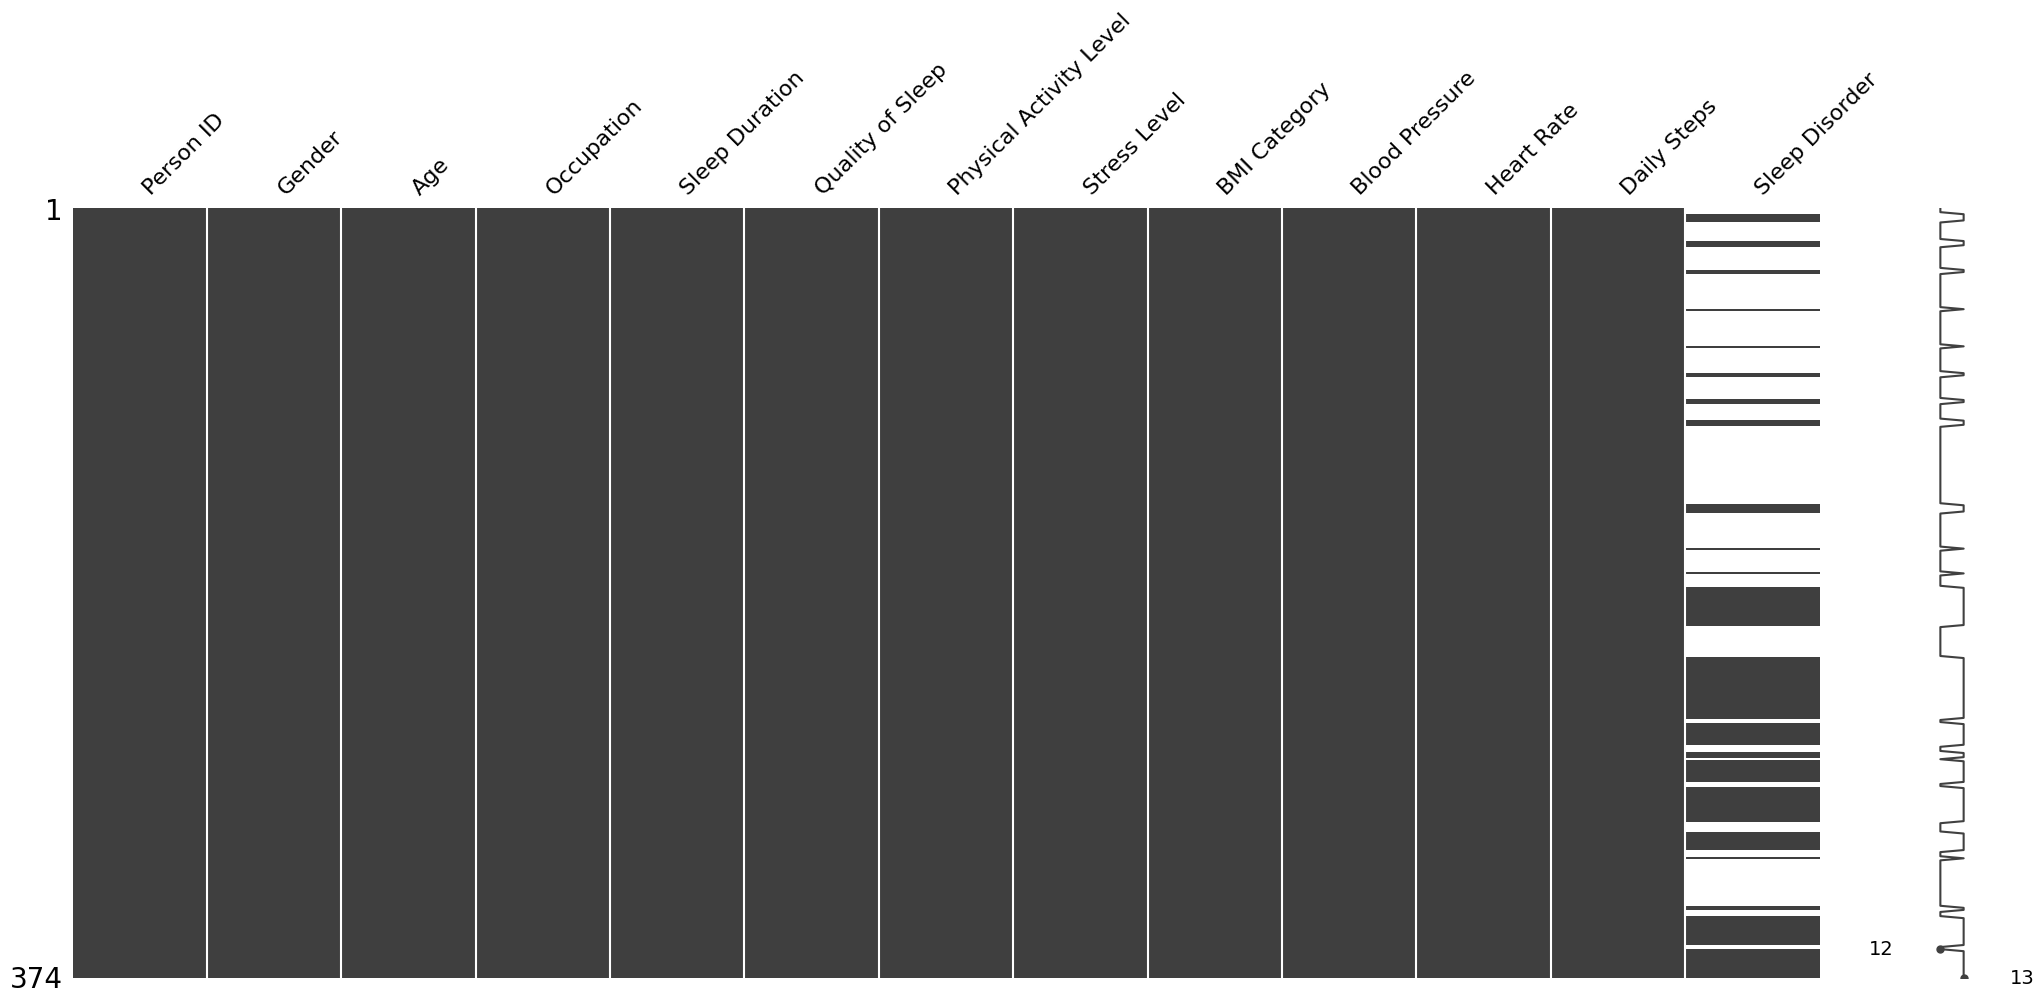

In [16]:
#kolom yang memiliki missing values
import missingno as msno

msno.matrix(data)

In [17]:
#menampilkan kolom yang memiliki missing values
missing_values_table(data)

Your selected dataframe has 13 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
Sleep Disorder,219,58.6


In [35]:
#Membersihkan missing value pada kolom sleep disorder
from sklearn.impute import SimpleImputer

dc = data.copy()

print(data.isnull().sum())

column_to_impute = 'Sleep Disorder'
imputer = SimpleImputer(strategy='most_frequent')
dc[column_to_impute] = imputer.fit_transform(dc[[column_to_impute]]).ravel()

print(dc.isnull().sum())

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64
Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


<Axes: >

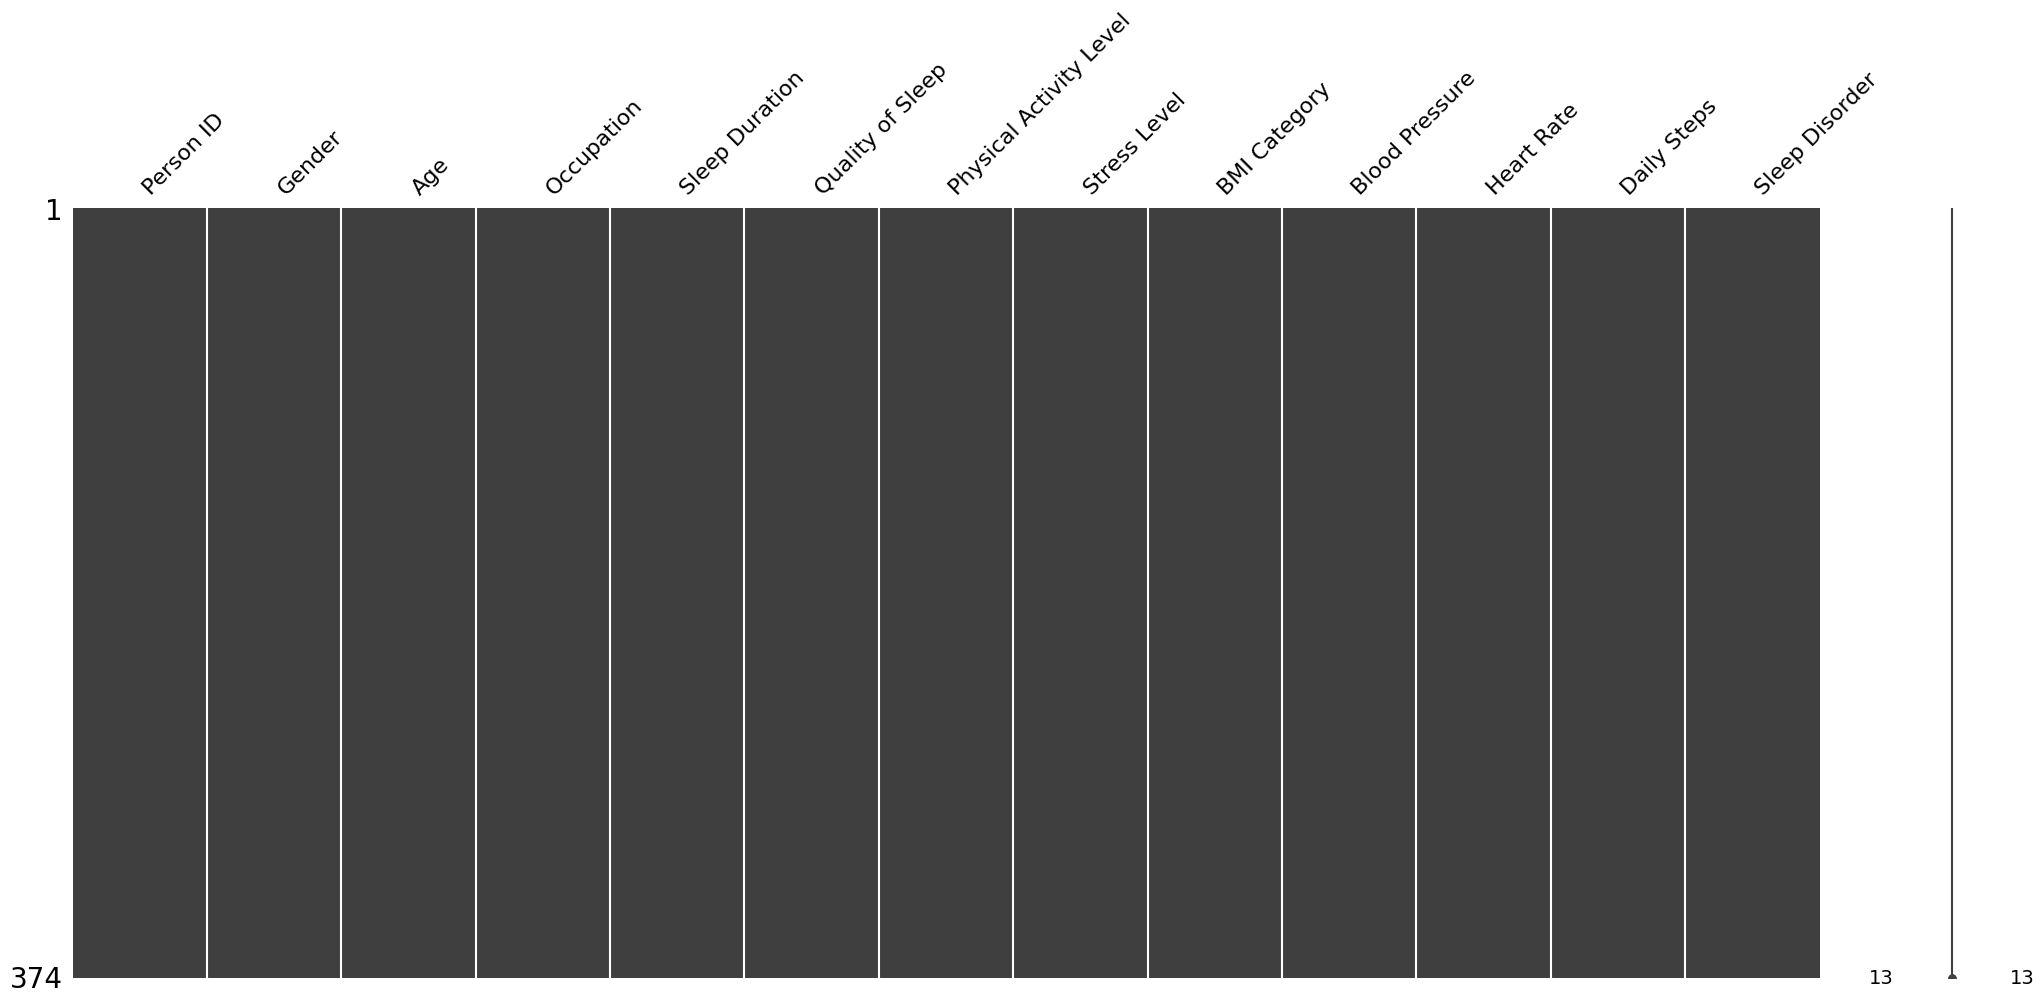

In [36]:
msno.matrix(dc)

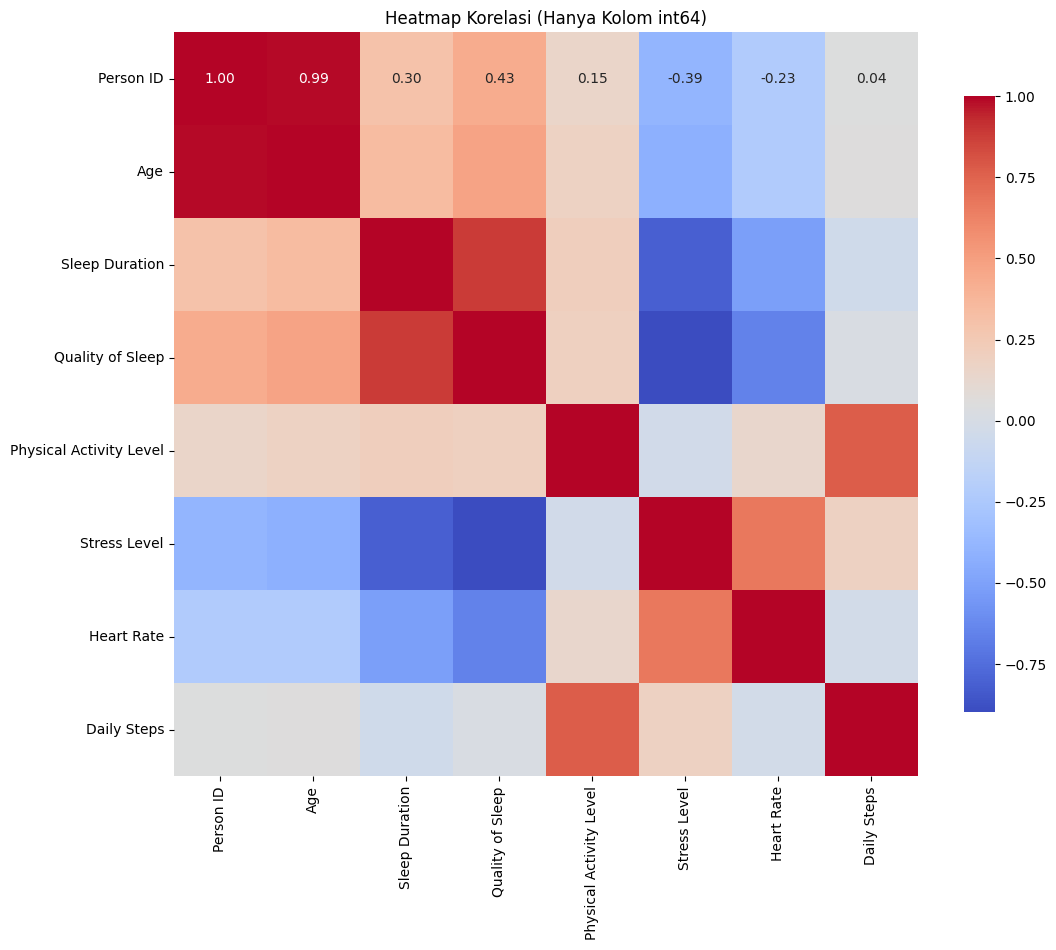

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

korelasi = data.copy() 
korelasi_int = korelasi.select_dtypes(include=['int64','float64'])

corr_matrix = korelasi_int.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Heatmap Korelasi (Hanya Kolom int64)')
plt.show()


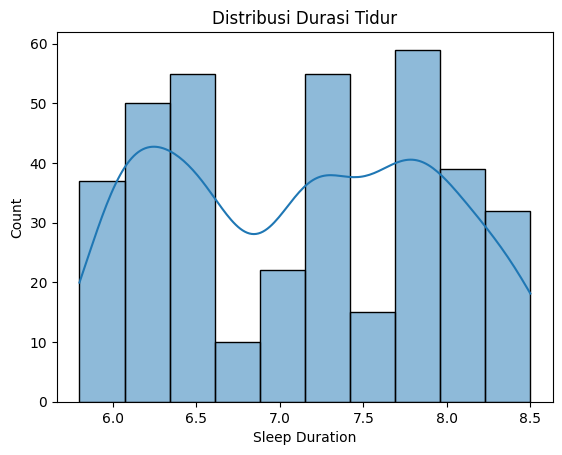

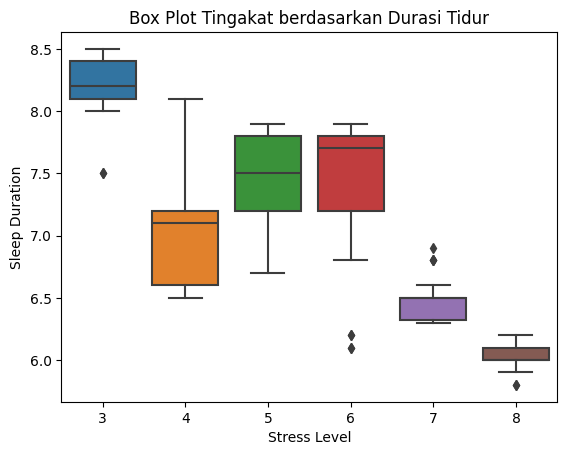

In [29]:
# Histogram
sns.histplot(dc['Sleep Duration'], kde=True)
plt.title('Distribusi Durasi Tidur')
plt.show()

# Box plot
sns.boxplot(x='Stress Level', y='Sleep Duration', data=dc)
plt.title('Box Plot Tingkat Stress berdasarkan Durasi Tidur')
plt.show()

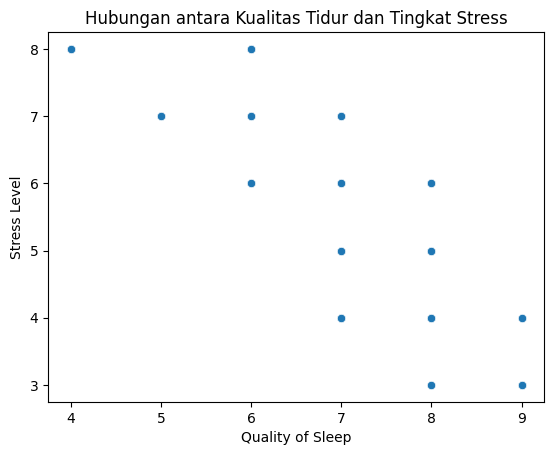

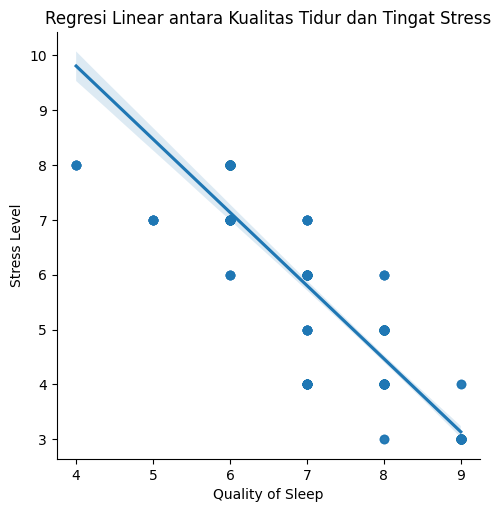

In [30]:
# Scatter plot
sns.scatterplot(x='Quality of Sleep', y='Stress Level', data=dc)
plt.title('Hubungan antara Kualitas Tidur dan Tingkat Stress')
plt.show()

# Scatter plot dengan regresi linear
sns.lmplot(x='Quality of Sleep', y='Stress Level', data=dc)
plt.title('Regresi Linear antara Kualitas Tidur dan Tingat Stress')
plt.show()

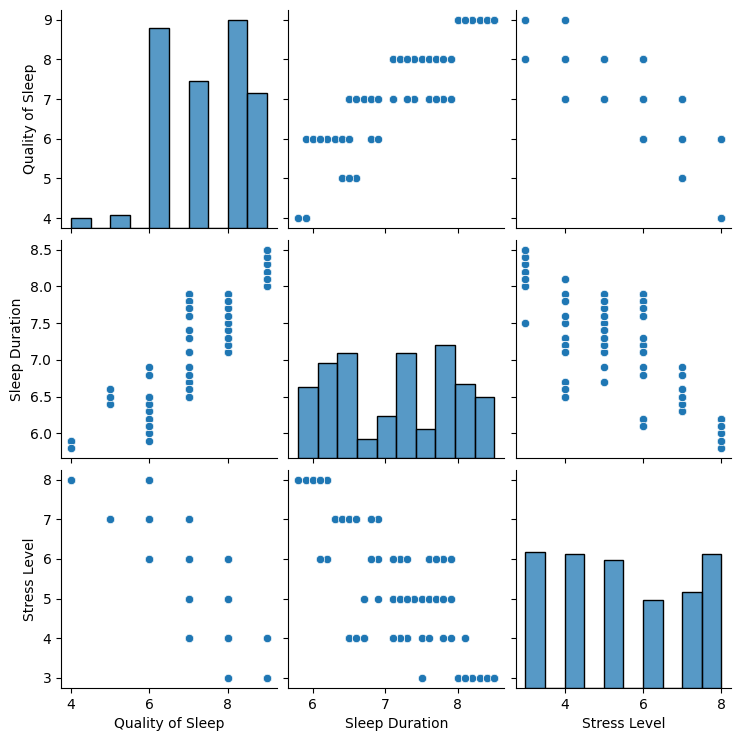

In [31]:
# Pairplot
sns.pairplot(dc[['Quality of Sleep', 'Sleep Duration', 'Stress Level']])
plt.show()

In [37]:
# 1. Mengonversi kolom 'Blood Pressure' menjadi dua kolom terpisah
dc[['Systolic', 'Diastolic']] = dc['Blood Pressure'].str.split('/', expand=True)

# 2. Ubah tipe dc kolom 'Systolic' dan 'Diastolic' menjadi numerik
dc['Systolic'] = pd.to_numeric(dc['Systolic'], errors='coerce')
dc['Diastolic'] = pd.to_numeric(dc['Diastolic'], errors='coerce')

# 3. Drop kolom 'Blood Pressure' yang sudah tidak diperlukan lagi
dc = dc.drop(columns=['Blood Pressure'])

# Encoding categorical features
label_encoders = {}
categorical_columns = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']
for column in categorical_columns:
    le = LabelEncoder()
    dc[column] = le.fit_transform(dc[column].astype(str))  # Encoding string ke numerik
    label_encoders[column] = le

# Selecting features and target
X = dc.drop(['Person ID', 'Stress Level'], axis=1)
y = dc['Stress Level']

# Splitting the dcset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(random_state=42))
])

# Training the model
pipeline.fit(X_train, y_train)

# Model performance on training dc
train_predictions = pipeline.predict(X_train)
train_r2 = metrics.r2_score(y_train, train_predictions)
train_mse = metrics.mean_squared_error(y_train, train_predictions)

# Model performance on test dc
test_predictions = pipeline.predict(X_test)
test_r2 = metrics.r2_score(y_test, test_predictions)
test_mse = metrics.mean_squared_error(y_test, test_predictions)

# Printing performance results
print("Training R^2:", train_r2)
print("Training MSE:", train_mse)
print("Test R^2:", test_r2)
print("Test MSE:", test_mse)

# Saving the pipeline
joblib.dump(pipeline, 'stress_predictor_pipeline.pkl')

# Saving label encoders for categorical columns
joblib.dump(label_encoders, 'label_encoders.pkl')

print("Model and encoders saved successfully!")


Training R^2: 0.9963970655567117
Training MSE: 0.011231438127090303
Test R^2: 0.9902108228064186
Test MSE: 0.030584000000000014
Model and encoders saved successfully!
